## Attention Model
### Step 1: Import libraries and display their versions

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from datetime import date
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Flatten

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [26]:
! python --version
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
!pip3 list | findstr scikit
!pip3 list | findstr tensorflow
!pip3 list | findstr matplotlib
print("seaborn version:", sns.__version__)

Python 3.11.9
pandas version: 2.2.3
numpy version: 1.26.4
scikit-learn                 1.5.1
tensorflow                   2.18.0
tensorflow_intel             2.18.0
tensorflow-io-gcs-filesystem 0.31.0
matplotlib                   3.9.2
matplotlib-inline            0.1.6
seaborn version: 0.13.2


### Step 2: Create helper functions

In [14]:
# function to get date diff from year start to today
def Get_Date_Diff(dtYear):
    today = date.today()
    start_of_year = date(dtYear, 1, 1)
    difference = today - start_of_year
    return difference.days

In [15]:
# function to plot the time series data
def Line_Plot(Title, x, y, legendlabal, labelX, labelY):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label = legendlabal)
    plt.title(Title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
# function to convert data to supervised learning format
# the function adds time step and divides the dataset into training and test sets
def Convert_Dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [17]:
# function to create the attention model
def Create_Attention_Model(input_shape):
    inputs = Input(shape=input_shape)
    # LSTM layer
    lstm_out = LSTM(64, return_sequences=True)(inputs)
    # attention layer
    attention_out = Attention()([lstm_out, lstm_out])
    flattened = Flatten()(attention_out)
    # output layer
    outputs = Dense(1)(flattened)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Steo 3: Prepare and process the data

In [18]:
# generate data
# set seed for reproductibility
np.random.seed(0)

# get the period of date generations
per = Get_Date_Diff(2024)

# generate a date range
date_range = pd.date_range(start='2024-01-01', periods=per, freq='D')

# generate random data
data = np.random.randn(per).cumsum()

# create a dataframe
df = pd.DataFrame(data, index = date_range, columns=['Value'])
print(df.head())

               Value
2024-01-01  1.764052
2024-01-02  2.164210
2024-01-03  3.142948
2024-01-04  5.383841
2024-01-05  7.251399


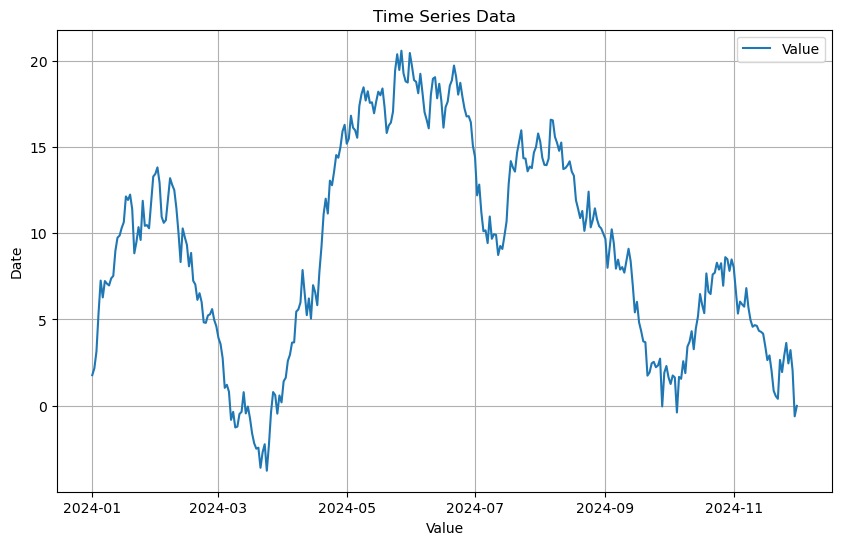

In [19]:
# visualize the data
# plot the time series data
Line_Plot('Time Series Data', df.index, df['Value'], 'Value', 'Value', 'Date')

In [20]:
# scale values
# normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(df)

In [21]:
# convert data to supervised learning format
# set time step
time_step = 10
X, y = Convert_Dataset(data_scaled, time_step)
# reshape for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

### Step 4: Create, fit, predict, and visualize the attention model

In [22]:
# create the model
model = Create_Attention_Model((time_step, 1))
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 10, 64)    │     16,896 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 10, 64)    │          0 │ lstm[0][0],       │
│ (Attention)         │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 640)       │          0 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │        641 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,537 (68.50 KB)

 Trainable params: 17,537 (68.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
# train the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

In [24]:
# make predictions
predictions = model.predict(X)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


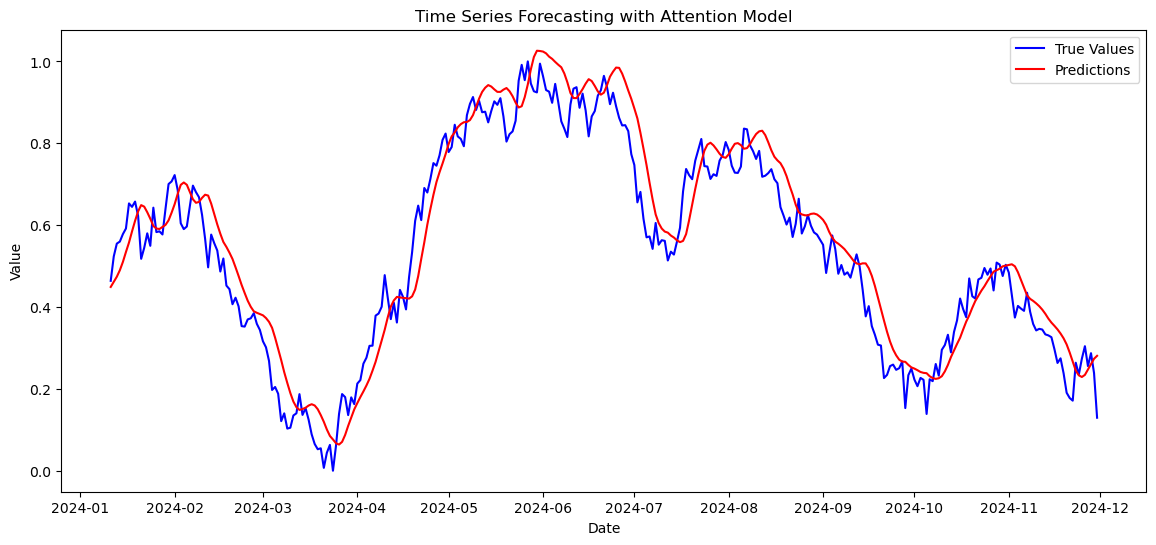

In [25]:
# prepare data for plotting
predicted_index = df.index[time_step:len(predictions) + time_step]
true_index = df.index[time_step:len(y) + time_step]

# plotting
plt.figure(figsize=(14, 6))
plt.plot(true_index, y, label='True Values', color='blue')
plt.plot(predicted_index, predictions, label='Predictions', color='red')
plt.title('Time Series Forecasting with Attention Model')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Transformer Model
###  Step 1: Import libraries and display their versions

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from datetime import date

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LayerNormalization, MultiHeadAttention, Dropout, Embedding, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [37]:
! python --version
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
!pip3 list | findstr scikit
!pip3 list | findstr tensorflow
!pip3 list | findstr matplotlib
print("seaborn version:", sns.__version__)

Python 3.11.9
pandas version: 2.2.3
numpy version: 1.26.4
scikit-learn                 1.5.1
tensorflow                   2.18.0
tensorflow_intel             2.18.0
tensorflow-io-gcs-filesystem 0.31.0
matplotlib                   3.9.2
matplotlib-inline            0.1.6
seaborn version: 0.13.2


### Step 2: Create helper functions

In [29]:
# function to get date diff from year start to today
def Get_Date_Diff(dtYear):
    today = date.today()
    start_of_year = date(dtYear, 1, 1)
    difference = today - start_of_year
    return difference.days

In [30]:
# function to convert data to supervised learning format
# the function adds time step and divides the dataset into training and test sets
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
    return np.array(sequences)

In [31]:
# function to plot the time series data
def Line_Plot(Title, x, y, legendlabal, labelX, labelY):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label = legendlabal)
    plt.title(Title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.legend()
    plt.grid(True)
    plt.show()

In [40]:
class Transformer(tf.keras.Model):
    def __init__(self, num_heads, d_model, num_blocks, output_size):
        super(Transformer, self).__init__()
        self.attention_layers = [layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model) for _ in range(num_blocks)]
        self.dense_layers = [layers.Dense(d_model, activation='relu') for _ in range(num_blocks)]
        self.fc_out = layers.Dense(output_size)

    def call(self, inputs):
        x = tf.expand_dims(inputs, axis=2)
        for att_layer, dense_layer in zip(self.attention_layers, self.dense_layers):
            attn_output = att_layer(x, x)
            x = dense_layer(attn_output) + x
        return self.fc_out(x[:, -1, :])

### Step 3: Prepare and process the data

In [42]:
# generate data
# set seed for reproductibility
np.random.seed(0)

# get the period of date generations
per = Get_Date_Diff(2024)

# generate a date range
data = np.random.randn(per).cumsum()
df = pd.DataFrame(data, columns=['Value'])
df['Date'] = date_range
df.set_index('Date', inplace=True)
print(df.head())

               Value
Date                
2024-01-01  1.764052
2024-01-02  2.164210
2024-01-03  3.142948
2024-01-04  5.383841
2024-01-05  7.251399


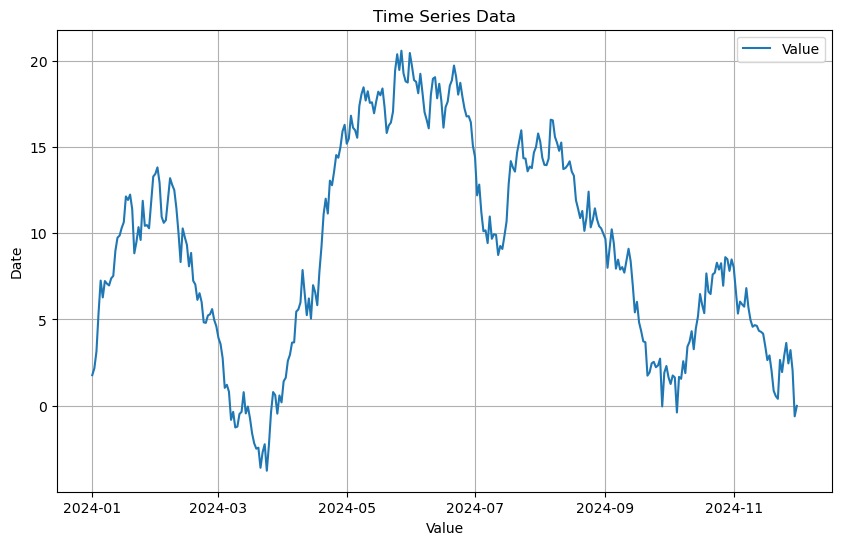

In [43]:
# visualize the data
# plot the time series data
Line_Plot('Time Series Data', df.index, df['Value'], 'Value', 'Value', 'Date')

In [45]:
# scale value
# normalize the data
scaler = MinMaxScaler()
df['Value'] = scaler.fit_transform(df[['Value']])

In [46]:
# convert data to supervised learning format
# create training and test sets
# set time step or window size
window_size = 30
sequences = create_sequences(df['Value'].values, window_size)
X = sequences[:, :-1]
y = sequences[:, -1]

### Step 4: Create, fit, predict, and visualize the attention model

In [47]:
# declare the hyperparameters
num_heads = 4
d_model = 64
num_blocks = 2
output_size = 1
n_epochs = 50
batch_size = 16
learning_rate = 0.001

In [48]:
# create the model
model = Transformer(num_heads=num_heads, d_model=d_model, num_blocks=num_blocks, output_size=output_size)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
print(model.summary())

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ multi_head_attention            │ ?                      │   0 (unbuilt) │
│ (MultiHeadAttention)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_attention_1          │ ?                      │   0 (unbuilt) │
│ (MultiHeadAttention)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [50]:
# training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X, y, epochs=n_epochs, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

In [51]:
# make predictions
y_pred = model.predict(X)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


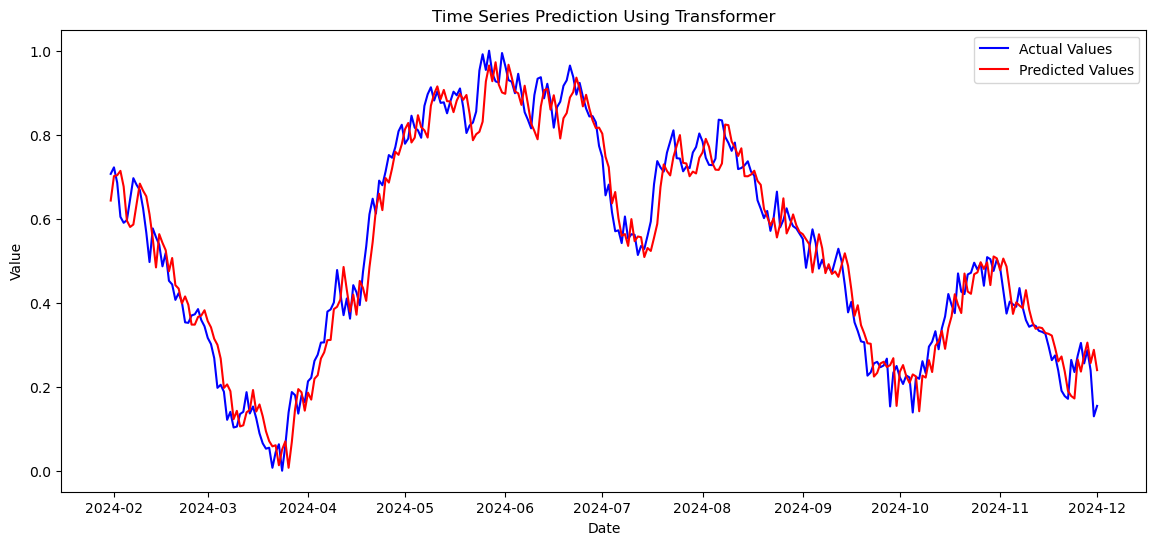

In [55]:
# plot prediction vs actual values
plt.figure(figsize=(14,6))
plt.plot(df.index[window_size:], df['Value'][window_size:], label='Actual Values', color='blue')
plt.plot(df.index[window_size:], y_pred,label='Predicted Values', color='red')
plt.title('Time Series Prediction Using Transformer')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show();